In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/EDA/Chronic_kidneyDisease/kidney_disease_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/EDA/Chronic_kidneyDisease/kidney_disease_train.csv')

In [ ]:
df_test.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,209,19.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,...,11.5,NaN,6900.0,NaN,no,no,no,good,no,no
1,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,13.3,52,8100.0,5.2,no,no,no,good,no,no
2,33,60.0,100.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,10.1,29,NaN,NaN,yes,no,no,poor,no,no
3,210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,...,7.3,20,9800.0,3.9,yes,yes,yes,good,no,yes
4,93,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,...,9.2,30,7000.0,3.2,yes,yes,yes,poor,no,no


In [ ]:
df_train.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [ ]:
 df_train.isnull().sum()

id                  0
age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 77
rc                 93
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [ ]:
print(df_train.shape)
print(df_test.shape)

(280, 26)
(120, 25)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [ ]:
'''
numeric_features = [column for column in df_train.columns if df_train[column].dtype in ['int64', 'float64']]
print(numeric_features)
'''

"\nnumeric_features = [column for column in df_train.columns if df_train[column].dtype in ['int64', 'float64']]\nprint(numeric_features)\n"

In [ ]:
df = pd.concat([df_train, df_test])
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [ ]:
df.shape

(400, 26)

<Axes: xlabel='bp', ylabel='count'>

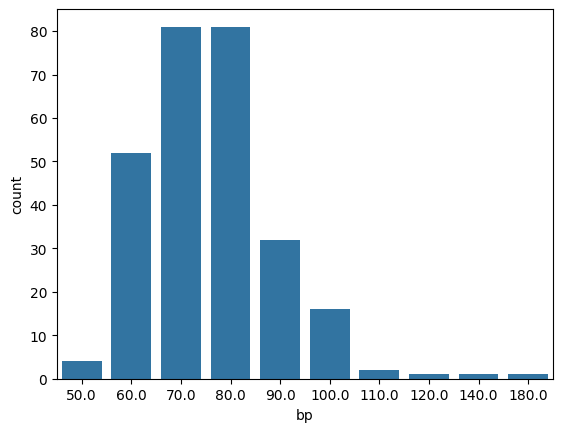

In [ ]:
sns.countplot(x='bp', data=df_train)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 119
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
def check_df(dataframe, head=5):
  print('shape')
  print(dataframe.shape)
  print('types')
  print(dataframe.dtypes)
  print('head')
  print(dataframe.head(head))
  print('NA')
  print(dataframe.isnull().sum())

check_df(df)

shape
(400, 26)
types
id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object
head
    id   age     bp     sg   al   su     rbc        pc         pcc  \
0  157  62.0   70.0  1.025  3.0  0.0  normal  abnormal  notpresent   
1  109  54.0   70.0    NaN  NaN  NaN     NaN       NaN  notpresent   
2   17  47.0   80.0    NaN  NaN  NaN     NaN       NaN  notpresent   
3  

<Axes: xlabel='count', ylabel='classification'>

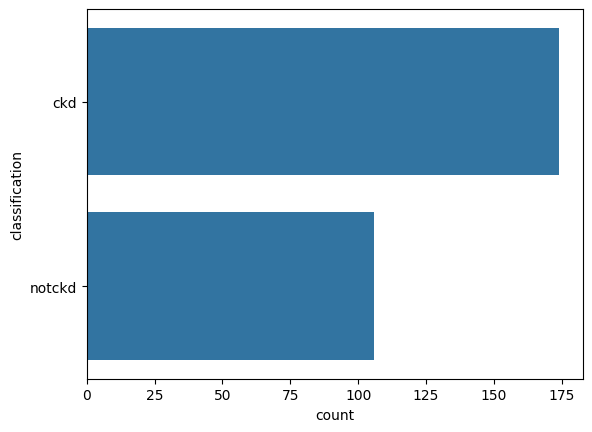

In [ ]:
sns.countplot(df['classification'], label="count")

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification    120
dtype: int64

We will only use specific selected columns to train our model, these columns are important as they have a higher correlation with our label

In [ ]:
cols_to_retain = ['sg','al','sc','hemo','pcv','wc','rbc','htn','classification']

df = df.drop([col for col in df.columns if col not in cols_to_retain], axis=1)
df = df.dropna(axis=0)

In [ ]:
df.head()

,sg,al,rbc,sc,hemo,pcv,wc,htn,classification
0,1.025,3.0,normal,1.7,12.6,39.0,7900,yes,ckd
3,1.025,0.0,normal,1.0,17.8,43.0,7200,no,notckd
4,1.015,4.0,normal,1.4,11.1,39.0,8300,yes,ckd
6,1.020,0.0,normal,0.9,17.5,40.0,9900,no,notckd
7,1.025,0.0,normal,1.0,15.3,44.0,10500,no,notckd


So this is our final dataset to deal with

In [ ]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-19-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-19-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-19-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-19-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-19-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprec

In [ ]:
df.head()

,sg,al,rbc,sc,hemo,pcv,wc,htn,classification
0,1.025,3.0,1,1.7,12.6,17,50,1,0
3,1.025,0.0,1,1.0,17.8,21,44,0,1
4,1.015,4.0,1,1.4,11.1,17,53,1,0
6,1.020,0.0,1,0.9,17.5,18,65,0,1
7,1.025,0.0,1,1.0,15.3,22,2,0,1


ckd:0, notckd:1

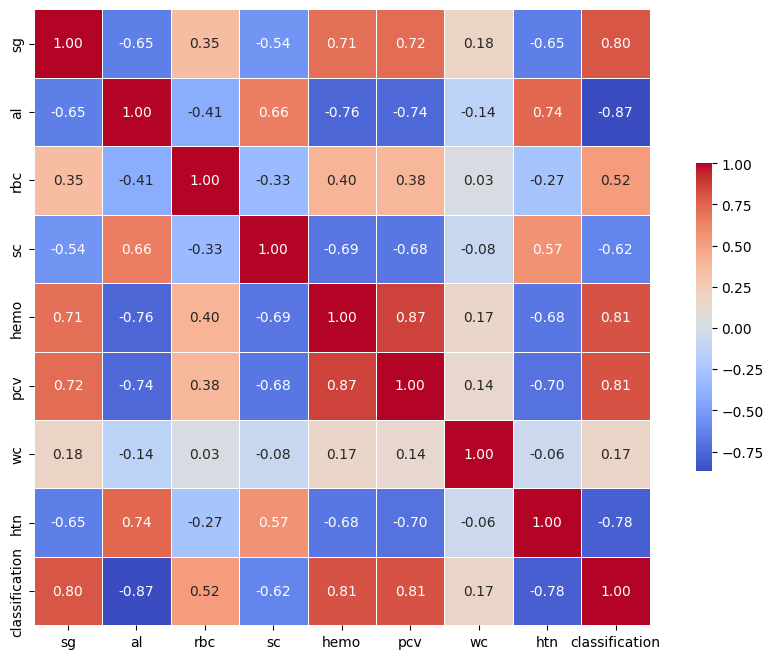

In [ ]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
x= df[['sg', 'al', 'rbc' ,'sc', 'hemo' ,'pcv', 'wc' ,'htn']]
#sg	al	rbc	sc	hemo	pcv	wc	htn
y = df['classification']

In [ ]:
#Split the data into 80% training and 20% testing
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,random_state=42)

In [ ]:
print("---------------------------------------------------------")
print("Shape of training data: ", x_train.shape)
print("Shape of test data    : ", x_test.shape )
print("---------------------------------------------------------")

---------------------------------------------------------
Shape of training data:  (108, 8)
Shape of test data    :  (27, 8)
---------------------------------------------------------


In [ ]:
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

In [ ]:
x_scaled = StandardScaler()
x_scaled.fit(x)
column_names = x.columns
x[column_names] = x_scaled.transform(x)

<ipython-input-26-d77820e5a80a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column_names] = x_scaled.transform(x)


# Lets get to model building, we will go with deep learning approach first




In [ ]:
#Build The model

model = Sequential()
model.add(Dense(128, input_dim=len(x.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(64, kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(64, kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(32, kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 15683 (61.26 KB)
Trainable params: 15683 (

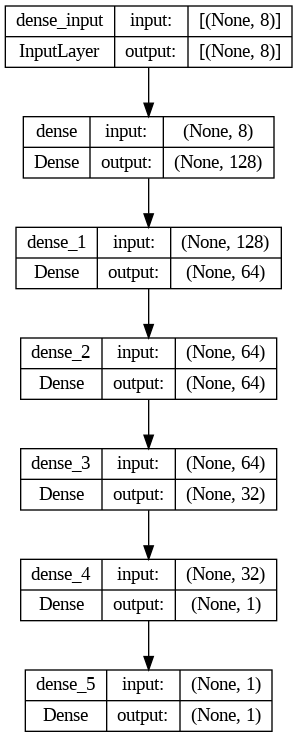

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

'''
ReduceLROnPlateau adjusts the learning rate to potentially overcome stagnation.
ModelCheckpoint saves the best performing model encountered during training.
EarlyStopping prevents overfitting by stopping training when validation loss plateaus.
'''

'\nReduceLROnPlateau adjusts the learning rate to potentially overcome stagnation.\nModelCheckpoint saves the best performing model encountered during training.\nEarlyStopping prevents overfitting by stopping training when validation loss plateaus.\n'

In [ ]:
history = model.fit(x=x_train, y=y_train, epochs=200, callbacks=[lrd,mcp,es], batch_size=256, validation_split=0.1)

Epoch 1/200
1/1 [==============================] - 6s 6s/step - loss: 0.7411 - accuracy: 0.4021 - val_loss: 0.7194 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 0.7343 - accuracy: 0.4021

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 321ms/step - loss: 0.7343 - accuracy: 0.4021 - val_loss: 0.7155 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 3/200
1/1 [==============================] - 0s 201ms/step - loss: 0.7280 - accuracy: 0.4021 - val_loss: 0.7116 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 4/200
1/1 [==============================] - 0s 282ms/step - loss: 0.7216 - accuracy: 0.4021 - val_loss: 0.7070 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 5/200
1/1 [==============================] - 0s 193ms/step - loss: 0.7144 - accuracy: 0.4021 - val_loss: 0.7021 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 6/200
1/1 [==============================] - 0s 185ms/step - loss: 0.7064 - accuracy: 0.4021 - val_loss: 0.6965 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 7/200
1/1 [==============================] - 0s 189ms/step - loss: 0.6973 - accuracy: 0.4021 - val_loss: 0.6900 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 8/200
1/1 [==============================] - 0s 214ms/step - loss: 0.6868 - accura

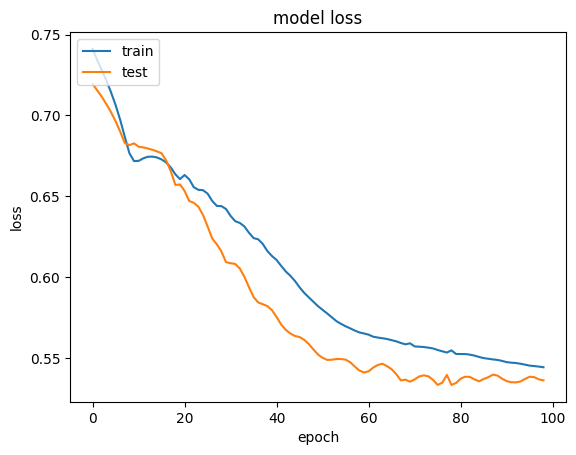

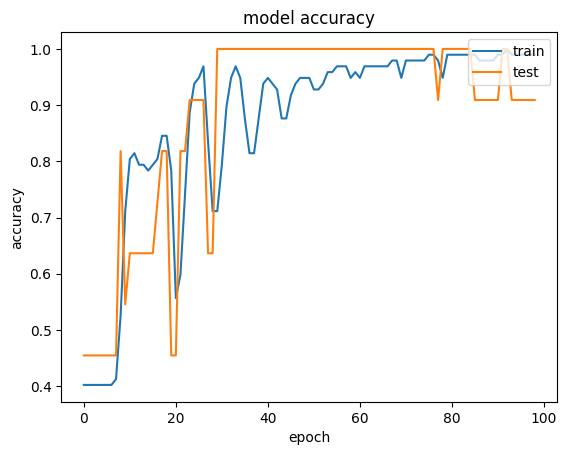

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

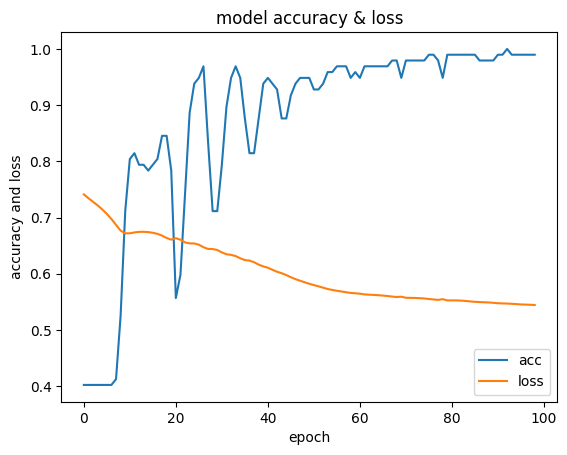

In [ ]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [ ]:
import glob
from tensorflow.keras.models import load_model

for model_file in glob.glob('model.h5'):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(x_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(x_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()



  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print()
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()

Model file:  model.h5
1/1 [==============================] - 0s 345ms/step - loss: 0.6038 - accuracy: 0.9630

Original  : 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Predicted : 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1

Scores    : loss =  0.6038255095481873  acc =  0.9629629850387573
---------------------------------------------------------



# Machine Learning approach

In [ ]:
#creating a function for the models we will use

def models(X_train,Y_train):

    # Logistic Regression

    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(x_train,y_train)


    # Decision Tree Classifier

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = "entropy" , random_state=0)
    tree.fit(x_train,y_train)

    # Random Forest Classifier

    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10 , criterion = "entropy",random_state=0)
    forest.fit(x_train,y_train)

    # Print the models accuracy on the training data

    print('[0] Logistic Regression Training Accuracy : ',log.score(x_train,y_train))
    print('[1] Decision Tree Classifier Training Accuracy : ',tree.score(x_train,y_train))
    print('[2] Random Forest Classifier Training Accuracy : ',forest.score(x_train,y_train))

    return log,tree,forest


In [ ]:
model = models(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0] Logistic Regression Training Accuracy :  0.9907407407407407
[1] Decision Tree Classifier Training Accuracy :  1.0
[2] Random Forest Classifier Training Accuracy :  1.0


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print("Model ", i)
    print(classification_report(y_test,model[i].predict(x_test)))
    print(accuracy_score(y_test,model[i].predict(x_test)))
    print()

Model  0
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.96      1.00      0.98        22

    accuracy                           0.96        27
   macro avg       0.98      0.90      0.93        27
weighted avg       0.96      0.96      0.96        27

0.9629629629629629

Model  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        22

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

1.0

Model  2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        22

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.0